In [ ]:

import sys

command_str = '{sys.executable} -m pip install --upgrade pillow'.format(sys=sys)
print(command_str)
#!{command_str}

In [1]:

import sys

# Insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../py')

In [2]:

%run ../../load_magic/dataframes.py
%run ../../load_magic/environment.py
%run ../../load_magic/paths.py
%run ../../load_magic/lists.py
%run ../../load_magic/soup.py
%run ../../load_magic/storage.py
%pprint
import wikipedia
import numpy as np

notebook_path = get_notebook_path()
print(notebook_path)
s = Storage()
print(['s.{}'.format(fn) for fn in dir(s) if not fn.startswith('_')])
dir()

Pretty printing has been turned OFF
C:\Users\dev\Documents\repositories\notebooks\Strauss–Howe\ipynb\Archetypes Exploration.ipynb
['s.attempt_to_pickle', 's.data_csv_folder', 's.data_folder', 's.encoding_type', 's.load_csv', 's.load_dataframes', 's.load_object', 's.save_dataframes', 's.saves_csv_folder', 's.saves_folder', 's.saves_pickle_folder', 's.store_objects']


['Config', 'In', 'Out', 'Path', 'RandomForestClassifier', 'SequenceMatcher', 'Storage', '_', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__nonzero__', '__package__', '__spec__', '_dh', '_i', '_i1', '_i2', '_ih', '_ii', '_iii', '_oh', 'bs', 'check_4_doubles', 'check_for_typos', 'conjunctify_list', 'copyfile', 'csv', 'encoding', 'example_iterrows', 'exit', 'filepath_regex', 'get_classifier', 'get_column_descriptions', 'get_data_structs_dataframe', 'get_datastructure_prediction', 'get_dir_tree', 'get_git_lfs_track_commands', 'get_importances', 'get_input_sample', 'get_ipython', 'get_max_rsquared_adj', 'get_module_version', 'get_notebook_path', 'get_page_soup', 'get_page_tables', 'get_specific_gitignore_files', 'get_struct_name', 'humanize_bytes', 'io', 'ipykernel', 'json', 'jupyter_config_dir', 'math', 'notebook_path', 'notebookapp', 'np', 'os', 'pd', 'pickle', 'plt', 'preprocess_data', 'print_all_files_ending_starting_with', 'print_all_files_ending_w

In [ ]:

!start %windir%\explorer.exe "{os.path.abspath(s.saves_pickle_folder)}"

In [3]:

for file_name in os.listdir(s.saves_pickle_folder):
    if file_name.endswith('_df.pickle'):
        df_name = file_name.split('.')[0]
        print("{} = s.load_object('{}')".format(df_name, df_name))
        print("{}".format(df_name))

archetypes_df = s.load_object('archetypes_df')
archetypes_df
calvinists_df = s.load_object('calvinists_df')
calvinists_df
colors_distance_df = s.load_object('colors_distance_df')
colors_distance_df
eras_df = s.load_object('eras_df')
eras_df
generations_df = s.load_object('generations_df')
generations_df
patriline_df = s.load_object('patriline_df')
patriline_df
presbyterians_df = s.load_object('presbyterians_df')
presbyterians_df
saecula_df = s.load_object('saecula_df')
saecula_df
saeculums_df = s.load_object('saeculums_df')
saeculums_df
turnings_df = s.load_object('turnings_df')
turnings_df
turning_numbers_df = s.load_object('turning_numbers_df')
turning_numbers_df
us_presidents_df = s.load_object('us_presidents_df')
us_presidents_df



---
# Turning Numbers

In [6]:

turning_numbers_df = s.load_object('turning_numbers_df')
turning_numbers_df.T.sample(10).T

,childhood,social_structure,institutions,turning_type,wars,ideals,worldview,midlife,special_priority,child_nurture
1,Prophet,Unified,Reinforced,High,Restorative,Settled,Simple,Hero,Maximum Community,Loosening
2,Nomad,Splintering,Attacked,Awakening,Controversial,Discovered,Complicating,Artist,Rising Individualism,Underprotective
3,Hero,Diversified,Eroded,Unraveling,Inconclusive,Debated,Complex,Prophet,Maximum Individualism,Tightening
4,Artist,Gravitating,Founded,Crisis,Total,Championed,Simplifying,Nomad,Rising Community,Overprotective


In [7]:

import inflect

p = inflect.engine()
tweet_str = 'According to Strauss-Howe generational theory, the {} of the {} turning is one of being {}.'
for row_index, row_series in turning_numbers_df.iterrows():
    print()
    print('{} Turning'.format(p.ordinal(row_index)))
    for column_name, column_value in row_series.iteritems():
        print(tweet_str.format(' '.join(column_name.split('_')),
                               p.ordinal(row_index), conjunctify_list(column_value.split(','))))


1st Turning
According to Strauss-Howe generational theory, the elderhoood of the 1st turning is one of being Nomad.
According to Strauss-Howe generational theory, the midlife of the 1st turning is one of being Hero.
According to Strauss-Howe generational theory, the young adulthood of the 1st turning is one of being Artist.
According to Strauss-Howe generational theory, the childhood of the 1st turning is one of being Prophet.
According to Strauss-Howe generational theory, the families of the 1st turning is one of being Strong.
According to Strauss-Howe generational theory, the child nurture of the 1st turning is one of being Loosening.
According to Strauss-Howe generational theory, the gap between gender roles of the 1st turning is one of being Maximum.
According to Strauss-Howe generational theory, the ideals of the 1st turning is one of being Settled.
According to Strauss-Howe generational theory, the institutions of the 1st turning is one of being Reinforced.
According to Strauss-

In [8]:

turning_numbers_df.columns

Index(['elderhoood', 'midlife', 'young_adulthood', 'childhood', 'families',
       'child_nurture', 'gap_between_gender_roles', 'ideals', 'institutions',
       'culture', 'social_structure', 'worldview', 'special_priority',
       'social_motivator', 'sense_of_greatest_need', 'vision_of_future',
       'wars', 'turning_type'],
      dtype='object')

In [9]:

turn_list = []
f_str = 'According to Strauss-Howe generational theory, the social motivators are different for each Turning: {}.'
for column_name, column_value in turning_numbers_df.social_motivator.iteritems():
    turn_list.append('for the {} Turning, it is {}'.format(p.ordinal(column_name), column_value))
print(f_str.format(conjunctify_list(turn_list)))

According to Strauss-Howe generational theory, the social motivators are different for each Turning: for the 1st Turning, it is Shame, for the 2nd Turning, it is Conscience, for the 3rd Turning, it is Guilt, and for the 4th Turning, it is Stigma.



# Archetypes

In [10]:

archetypes_df = s.load_object('archetypes_df')
gen_list = []
for column_name, column_value in archetypes_df.T.primary_focus_coming_of_age.iteritems():
    n = ''
    if column_value[0] in list('aeiou'):
        n = 'n'
    gen_list.append('for the {} generation, the slap has a{} {} focus'.format(column_name, n, column_value))
f_str = 'According to Strauss-Howe generational theory, the "life slaps" are different for each generation: {}.'
print(f_str.format(conjunctify_list(gen_list)))

According to Strauss-Howe generational theory, the "life slaps" are different for each generation: for the Hero generation, the slap has an outer-world focus, for the Artist generation, the slap has an inter-dependency focus, for the Prophet generation, the slap has an inner-world focus, and for the Nomad generation, the slap has a self-sufficiency focus.


In [11]:

archetypes_df.T.sample(3).T

,Prophet,Artist,Nomad
archetypes,,,
generations,"Reformation,Puritan,Awakening,Transcendental,M...","Humanist,Parliamentary,Enlightenment,Compromis...","Reprisal,Cavalier,Liberty,Gilded,Lost,X"
reputation_as_child,spirited,placid,bad
coming_of_age,sanctifying,unfulfilling,alienating
primary_focus_coming_of_age,inner-world,inter-dependency,self-sufficiency
young_adulthood,reflecting,improving,competing
transition_in_midlife,detached to judgmental,conformist to experimental,frenetic to exhausted
leadership_style_entering_elderhood,"righteous,austere","pluralistic,indecisive","solitary,pragmatic"
reputation_as_elder,wise,sensitive,tough
treatment_as_elder,respected,liked,abandoned


In [12]:

print('According to Strauss-Howe generational theory')
tweet_str = '{}: {}'
for archetype_name, row_series in archetypes_df.T.iterrows():
    print()
    print('The {} Archetype'.format(archetype_name))
    for column_name, column_value in row_series.iteritems():
        print(tweet_str.format(' '.join(column_name.title().split('_')), conjunctify_list(column_value.split(','))))

According to Strauss-Howe generational theory

The Hero Archetype
Generations: Arthurian, Elizabethan, Glorious, Republican, G.I., and Millennial
Reputation As Child: good
Coming Of Age: empowering
Primary Focus Coming Of Age: outer-world
Young Adulthood: building
Transition In Midlife: energetic to hubristic
Leadership Style Entering Elderhood: collegial and expansive
Reputation As Elder: powerful
Treatment As Elder: rewarded
How It Is Nurtured: tightening
How It Nurtures: relaxing
Positive Reputation: selfless, rational, and competent
Negative Reputation: unreflective, mechanistic, and overbold
Endowments: community, affluence, and technology

The Artist Archetype
Generations: Humanist, Parliamentary, Enlightenment, Compromise, Progressive, Silent, and Homelanders
Reputation As Child: placid
Coming Of Age: unfulfilling
Primary Focus Coming Of Age: inter-dependency
Young Adulthood: improving
Transition In Midlife: conformist to experimental
Leadership Style Entering Elderhood: plurali


# Generations

In [10]:

generations_df = s.load_object('generations_df')
columns_list = ['saeculum_name', 'turnings_archetype']
for generation_name, row_series in generations_df.sort_values('turning_year_begin')[columns_list].iterrows():
    saeculum_name = row_series.saeculum_name
    turnings_archetype = row_series.turnings_archetype
    if turnings_archetype == 'Hero':
        print(f'The {generation_name} generation institutionalized the values of the {saeculum_name} saeculum.')

The Arthurian generation institutionalized the values of the Late Medieval saeculum.
The Elizabethan generation institutionalized the values of the Reformation saeculum.
The Glorious generation institutionalized the values of the New World saeculum.
The Republican generation institutionalized the values of the Revolutionary saeculum.
The Civil War generation institutionalized the values of the Civil War saeculum.
The G.I. generation institutionalized the values of the Great Power saeculum.
The Millennial generation institutionalized the values of the Millennial saeculum.


In [5]:

generations_df = s.load_object('generations_df')
print(generations_df.turnings_archetype.to_dict())
generations_df.T.sample(7).T

{'Arthurian': 'Hero', 'Humanist': 'Artist', 'Reformation': 'Prophet', 'Reprisal': 'Nomad', 'Elizabethan': 'Hero', 'Parliamentary': 'Artist', 'Puritan': 'Prophet', 'Cavalier': 'Nomad', 'Glorious': 'Hero', 'Enlightenment': 'Artist', 'Awakening': 'Prophet', 'Liberty': 'Nomad', 'Republican': 'Hero', 'Compromise': 'Artist', 'Transcendental': 'Prophet', 'Gilded': 'Nomad', 'Civil War': 'Hero', 'Progressive': 'Artist', 'Missionary': 'Prophet', 'Lost': 'Nomad', 'G.I.': 'Hero', 'Silent': 'Artist', 'Baby Boom': 'Prophet', '13th': 'Nomad', 'Millennial': 'Hero', 'Homeland': 'Artist'}


,turnings_archetype,turning_year_end,childhood_turning_entered,turning_year_begin,birth_year_begin,childhood_turning_description,saeculum_name
generation_name,,,,,,,
Arthurian,Hero,1459,3,1435,1433,Retreat from France,Late Medieval
Humanist,Artist,1497,4,1459,1461,War of the Roses,Late Medieval
Reformation,Prophet,1517,1,1497,1483,Tudor Renaissance,Reformation
Reprisal,Nomad,1542,2,1517,1512,Protestant Reformation,Reformation
Elizabethan,Hero,1569,3,1542,1541,"Marian Restoration, Counter-Reformation",Reformation
Parliamentary,Artist,1594,4,1569,1566,Armada Crisis,Reformation
Puritan,Prophet,1621,1,1594,1588,Merrie England,New World
Cavalier,Nomad,1649,2,1621,1618,"Puritan Awakening,Antinomian Controversy",New World
Glorious,Hero,1675,3,1649,1648,"English Civil War, Republic, Restoration",New World


In [14]:

import matplotlib.pyplot as plt

# Use the following only if you are on a high definition device
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

from scipy.optimize import curve_fit
import numpy as np
import math
%matplotlib inline

def fit_curve(df=generations_df, column_prefix='birth_year'):
    begin_column = '{}_begin'.format(column_prefix)
    end_column = '{}_end'.format(column_prefix)
    
    def func(x, a, b):
        
        return a*x + b
    
    columns_list = [begin_column, end_column]
    mask_series = False
    for column_name in columns_list:
        df[column_name] = pd.to_numeric(df[column_name])
        mask_series = mask_series | df[column_name].isnull()
    df = df[~mask_series][columns_list]
    begin_data = np.array(object=df[begin_column].tolist())
    end_data = np.array(object=df[end_column].tolist())
    popt, pcov = curve_fit(func, begin_data, end_data)
    line_2d_obj = plt.plot(begin_data, end_data, 'b-', label='data')

    def get_end_year(begin_year):
        '''Get the end year given the begin year'''

        return popt[0]*begin_year + popt[1]

    label_str = 'fit: end_year = %5.1f * begin_year + %5.1f' % tuple(popt)
    line_2d_obj = plt.plot(begin_data, get_end_year(begin_data), 'r-', label=label_str)
    plt.xlabel('Begin Year')
    plt.ylabel('End Year')
    legend_obj = plt.legend()
    
    return popt, get_end_year

fit: end_year = 0.9852826348787512 * begin_year + 48.14689737272639
The Homeland Generation: 2005-2023.


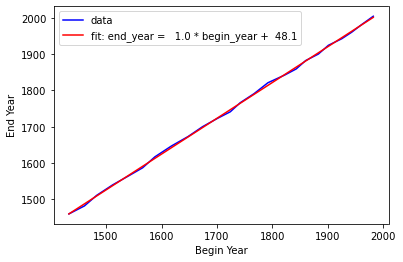

In [16]:

popt, get_end_year_birth = fit_curve()
mask_series = generations_df.birth_year_end.isnull()
begin_year_birth = generations_df[mask_series]['birth_year_begin'].tolist()[0]
print('fit: end_year = {} * begin_year + {}'.format(*popt))
end_year_birth = int(get_end_year_birth(begin_year_birth))
print('The Homeland Generation: {}-{}.'.format(begin_year_birth, end_year_birth))


# The Babbitt Patriline

In [4]:

patriline_df = s.load_object('patriline_df')
print(patriline_df.columns.tolist())
columns_list = ['generation_name', 'saeculum_name', 'date_of_birth', 'place_of_birth', 'date_of_death', 'place_of_death']
patriline_df.sort_values('year_of_birth')[columns_list]

['year_of_birth', 'year_of_death', 'generation_name', 'date_of_birth', 'place_of_birth', 'birth_longitude', 'birth_latitude', 'date_of_death', 'place_of_death', 'death_longitude', 'death_latitude', 'saeculum_name', 'xkcd_color', 'css4_color', 'xkcd_text_color', 'css4_text_color', 'map_link', 'birth_coordinates']


,generation_name,saeculum_name,date_of_birth,place_of_birth,date_of_death,place_of_death
patriarch_name,,,,,,
"(No Name), Sr.",Reprisal,Reformation,estimated between 1485 and 1545,Unknown Place of Birth,Unknown Date of Death,Unknown Place of Death
"(No Name), Jr.",Elizabethan,Reformation,1550,Unknown Place of Birth,"April 01, 1624 (74)",Unknown Place of Death
Thomas Bobbet,Parliamentary,Reformation,"October 25, 1584","Coney Weston, Suffolk, England, United Kingdom",1636 (51),"Norfolk, England, United Kingdom"
Edward Bobet,Cavalier,New World,1626,England,"June 25, 1675 (49)","Berkley Bridge, Near Taunton, Plymouth Colony ..."
"Elkanah Babbitt, I",Glorious,New World,"December 15, 1665","Taunton, Bristol County, Massachusetts, United...","December 22, 1735 (70)","Berkley, Bristol County, Province of Massachus..."
"Elkanah Babbitt, II",Enlightenment,New World,"April 22, 1690","Berkley, Bristol County, New Plymouth Colony","April 01, 1754 (63)","Berkley, Bristol County, Province of Massachsutts"
"Elkanah Babbitt, III",Awakening,Revolutionary,1710,"Berkley, Bristol County, Province of Massachus...",1816 (106),"Cooperstown, Otsego, N.Y."
"Elkanah Babbitt, IV",Liberty,Revolutionary,"December 05, 1737","New Milford, New Haven County, Connecticut","February 09, 1807 (69)","Fly Creek, Otsego County, New York, United States"
David Babbitt,Republican,Revolutionary,1766,"Lanesborough, Berkshire, MA, United States","September 08, 1816 (50)","Lanesborough, Berkshire, MA"


In [19]:

patriline_df.columns.tolist()

['year_of_birth', 'year_of_death', 'generation_name', 'date_of_birth', 'place_of_birth', 'birth_longitude', 'birth_latitude', 'date_of_death', 'place_of_death', 'death_longitude', 'death_latitude', 'saeculum_name', 'xkcd_color', 'css4_color', 'xkcd_text_color', 'css4_text_color', 'map_link', 'birth_coordinates']

In [7]:

archetype_dict = generations_df.turnings_archetype.to_dict()
patriline_df['archetype_name'] = patriline_df.generation_name.map(lambda x: archetype_dict[x])
s.store_objects(patriline_df=patriline_df)

Pickling to C:\Users\dev\Documents\repositories\notebooks\Strauss–Howe\saves\pickle\patriline_df.pickle


In [9]:

' - '.join(patriline_df.sort_values('year_of_birth').archetype_name)

'Nomad - Hero - Artist - Nomad - Hero - Artist - Prophet - Nomad - Hero - Artist - Prophet - Artist - Nomad - Artist - Nomad - Hero'

In [20]:

mask_series = (patriline_df.year_of_birth < 1918) & (patriline_df.year_of_death > 1918)
'The members of the patriline that were alive during the Spanish Flu were {}'.format(conjunctify_list(patriline_df[mask_series].index))

'The members of the patriline that were alive during the Spanish Flu were Joseph Robert Babbitt, Sr. and David William Babbitt, Jr.'

In [21]:

conjunctify_list(['{} was {} years old at this time'.format(patriarch, 1918-row_series.year_of_birth) for patriarch,
                  row_series in patriline_df[mask_series].iterrows()])

'Joseph Robert Babbitt, Sr. was 27 years old at this time and David William Babbitt, Jr. was 60 years old at this time'

In [22]:

tables_url = 'https://en.wikipedia.org/wiki/List_of_epidemics'
tables_list = get_page_tables(tables_url)

[(1, (237, 6)), (2, (28, 2)), (3, (22, 2)), (4, (14, 2)), (11, (12, 2)), (10, (7, 3)), (8, (5, 2)), (5, (4, 2)), (7, (4, 2)), (9, (3, 2)), (12, (3, 2)), (0, (2, 2)), (6, (2, 2))]


In [67]:

from datetime import date

epidemic_histories_df = tables_list[1].copy()
epidemic_histories_df.columns = ['death_toll', 'epidemic_location', 'epidemic_date', 'event_name', 'disease_name', 'event_references']
epidemic_histories_df['begin_year'] = np.nan
epidemic_histories_df['end_year'] = np.nan
for i in range(epidemic_histories_df.shape[0]):
    date_str = epidemic_histories_df.loc[i, 'epidemic_date']
    daterange_list = re.sub('[^\d–]+', '', date_str.split('(')[0]).split('–')
    begin_year = int(daterange_list[0])
    epidemic_histories_df.loc[i, 'begin_year'] = begin_year
    if date_str.endswith('–present'):
        epidemic_histories_df.loc[i, 'end_year'] = date.today().year
    else:
        if (len(daterange_list) == 2) and (daterange_list[1] != ''):
            epidemic_histories_df.loc[i, 'end_year'] = int(daterange_list[1])
        else:
            epidemic_histories_df.loc[i, 'end_year'] = begin_year
epidemic_histories_df.loc[0, 'begin_year'] = -1200
epidemic_histories_df.loc[1, 'begin_year'] = -429
epidemic_histories_df.loc[2, 'begin_year'] = -412
epidemic_histories_df.loc[0, 'end_year'] = -1200
epidemic_histories_df.loc[1, 'end_year'] = -426
epidemic_histories_df.loc[2, 'end_year'] = -412
epidemic_histories_df.begin_year = epidemic_histories_df.begin_year.map(lambda x: int(x))
epidemic_histories_df.end_year = epidemic_histories_df.begin_year.map(lambda x: int(x))
s.store_objects(epidemic_histories_df=epidemic_histories_df)
locations_list = ['London', 'Seneca nation', 'England', 'Southern New England, especially the Wampanoag people', 'Thirteen Colonies',
                  'Massachusetts Bay Colony', 'North America', 'North America, West Indies', 'North America, present-day Pittsburgh area.',
                  'Plains Indians', 'Pueblo Indians', 'United States', 'Asia, Europe, North America', 'England, France', 'Great Plains',
                  'Worldwide', 'Europe, North America, South America', 'United States of America', 'Los Angeles',
                  'Americas']
year_min = patriline_df.year_of_birth.min()
mask_series = (epidemic_histories_df.end_year > year_min) & epidemic_histories_df.epidemic_location.isin(locations_list)
for row_index, row_series in epidemic_histories_df[mask_series].iterrows():
    begin_year = row_series.begin_year
    end_year = row_series.end_year
    event_name = row_series.event_name
    if str(event_name) == 'nan':
        epidemic_date = row_series.epidemic_date
        epidemic_location = row_series.epidemic_location
        disease_name = row_series.disease_name
        event_name = '{} {} {} epidemic'.format(epidemic_date, epidemic_location, disease_name)
    pmask_series = (patriline_df.year_of_birth < begin_year) & (patriline_df.year_of_death > end_year)
    df = patriline_df[pmask_series]
    if df.shape[0] > 0:
        print()
        print_str = ''
        print_str += 'The members of the patriline that were alive during the {} were {}.'.format(event_name,
                                                                                                  conjunctify_list(df.index))
        print_str += ' '
        print_str += conjunctify_list(['{} was {} years old when it began'.format(patriarch,
                                                                                  begin_year-row_series.year_of_birth) for patriarch,
                                       row_series in patriline_df[pmask_series].iterrows()])
        print_str += '.'
        print_str = re.sub(' \.', '.', print_str)
        print_str = re.sub('\.\.', '.', print_str)
        print(print_str)

Pickling to D:\Documents\Repositories\notebooks\Strauss–Howe\saves\pickle\epidemic_histories_df.pickle

The members of the patriline that were alive during the 1563 London plague were (No Name), Jr. and (No Name), Sr. (No Name), Jr. was 13 years old when it began and (No Name), Sr. was 45 years old when it began.

The members of the patriline that were alive during the 1592–1596 Seneca nation Measles epidemic were Thomas Bobbet and (No Name), Jr. Thomas Bobbet was 8 years old when it began and (No Name), Jr. was 42 years old when it began.

The members of the patriline that were alive during the 1592–93 London plague were Thomas Bobbet and (No Name), Jr. Thomas Bobbet was 8 years old when it began and (No Name), Jr. was 42 years old when it began.

The members of the patriline that were alive during the 1603 England Plague epidemic were Thomas Bobbet and (No Name), Jr. Thomas Bobbet was 19 years old when it began and (No Name), Jr. was 53 years old when it began.

The members of the pa

In [68]:

#ta_dict = generations_df.turnings_archetype.to_dict()
for archetype in generations_df.turnings_archetype.unique():
    mask_series = (generations_df.turnings_archetype == archetype)
    mask_series = patriline_df.generation_name.isin(generations_df[mask_series].index)
    print(archetype, patriline_df[mask_series].index.tolist())

Hero ['Stephen Elkanah Babbitt', 'David Babbitt', 'Elkanah Babbitt, I', '(No Name), Jr.']
Artist ['Joseph Robert Babbitt, Jr.', 'David William Babbitt, Jr.', 'William David Babbitt', 'Elkanah Babbitt, II', 'Thomas Bobbet']
Prophet ['David William Babbitt, Sr.', 'Elkanah Babbitt, III']
Nomad ['David George Babbitt', 'Joseph Robert Babbitt, Sr.', 'Elkanah Babbitt, IV', 'Edward Bobet', '(No Name), Sr.']



# Eras

In [12]:

eras_df = s.load_object('eras_df')
eras_df

,1908–1929 (Unraveling),1929–1946 (Crisis),1946–1964 (High),1964–1984 (Awakening),1984–2008 (Unraveling)
eras,,,,,
Key Events,Four Freedoms World War I Prohibition Scopes T...,Crash of 1929 New Deal Pearl Harbor D-Day,McCarthyism Levittown Affluent Society Little ...,Kent State Woodstock Watergate Tax Revolt,Perestroika National Debt Culture Wars Simpson...
Entering Elderhood (Age 63–83),Progressive (Artist) empathic,Missionary (Prophet) wise,Lost (Nomad) tough,G.I. (Hero) hubristic,Silent (Artist) empathic
Entering Midlife (Ages 42–62),Missionary (Prophet) moralistic,Lost (Nomad) pragmatic,G.I. (Hero) powerful,Silent (Artist) indecisive,Boom (Prophet) moralistic
Entering Young Adulthood (Ages 21–41),Lost (Nomad) alienated,G.I. (Hero) heroic,Silent (Artist) sensitive,Boom (Prophet) narcissistic,Gen X (Nomad) alienated
Entering Childhood (Ages 0–20),G.I. (Hero) protected,Silent (Artist) suffocated,Boom (Prophet) indulged,Gen X (Nomad) abandoned,Millennial (Hero) protected



# Saecula

In [13]:

saecula_df = s.load_object('saecula_df')
print(saecula_df.columns.tolist())
saecula_df.T.sample(6).T

['awakening_name', 'awakening_climax_year', 'awakening_year_begin', 'awakening_year_end', 'crisis_name', 'crisis_climax_year', 'crisis_year_begin', 'crisis_year_end', 'years_from_crisis_to_awakening', 'years_from_awakening_to_crisis', 'years_from_crisis_to_crisis']


,awakening_climax_year,awakening_name,crisis_year_end,years_from_crisis_to_crisis,awakening_year_end,awakening_year_begin
Saeculum,,,,,,
Late Medieval,NaN,NaN,1487,NaN,NaN,NaN
Reformation,1536,Protestant Reformation,1594,103,1542,1517
New World,1640,Puritan Awakening,1704,101,1649,1621
Revolutionary,1741,Great Awakening,1794,92,1746,1727
Civil War,1831,Transcendental Awakening,1865,82,1844,1822
Great Power,1896,Third Great Awakening,1946,81,1908,1886
Millennial,1974,Consciousness Revolution,2029,81,1984,1964


In [14]:

columns_list = [cn for cn in saecula_df.columns if 'crisis' in cn.lower()]
saecula_df[columns_list]

,crisis_name,crisis_climax_year,crisis_year_begin,crisis_year_end,years_from_crisis_to_awakening,years_from_awakening_to_crisis,years_from_crisis_to_crisis
Saeculum,,,,,,,
Late Medieval,Wars of the Roses,1485,1459,1487,NaN,NaN,NaN
Reformation,Armada Crisis,1588,1569,1594,51.0,52.0,103.0
New World,Glorious Revolution,1689,1675,1704,52.0,49.0,101.0
Revolutionary,American Revolution,1781,1773,1794,52.0,40.0,92.0
Civil War,Civil War,1863,1860,1865,50.0,32.0,82.0
Great Power,Great Depression and World War II,1944,1929,1946,33.0,48.0,81.0
Millennial,Global Financial Crisis,2025,2008,2029,30.0,51.0,81.0


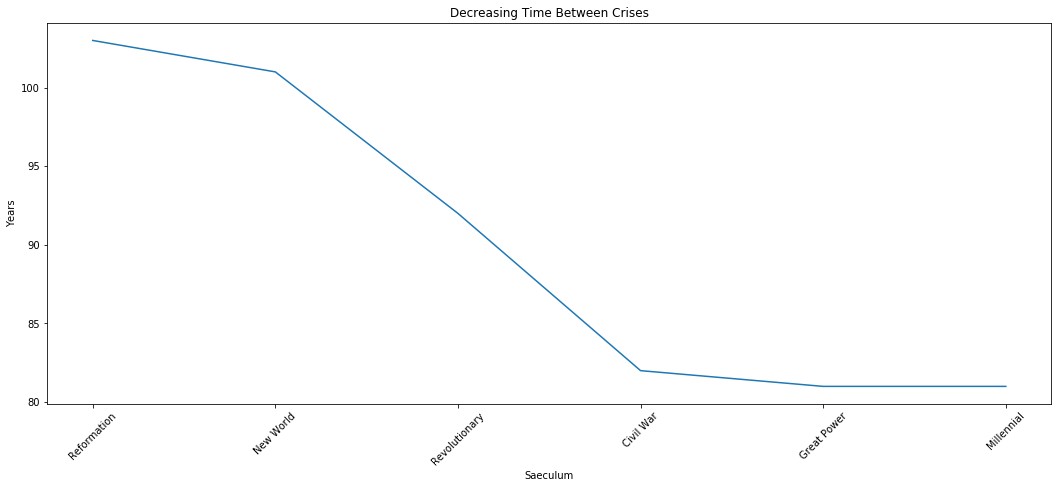

In [15]:

c = saecula_df.years_from_crisis_to_crisis.plot
fig, ax = plt.subplots(figsize=(18, 7))
AxesSubplot_obj = c.line(ax=ax, title='Decreasing Time Between Crises', rot=45)
ylabel_text = ax.set_ylabel('Years')

In [16]:

columns_list = ['crisis_name', 'crisis_climax_year', 'crisis_year_begin', 'crisis_year_end']
saecula_df[columns_list]

,crisis_name,crisis_climax_year,crisis_year_begin,crisis_year_end
Saeculum,,,,
Late Medieval,Wars of the Roses,1485,1459,1487
Reformation,Armada Crisis,1588,1569,1594
New World,Glorious Revolution,1689,1675,1704
Revolutionary,American Revolution,1781,1773,1794
Civil War,Civil War,1863,1860,1865
Great Power,Great Depression and World War II,1944,1929,1946
Millennial,Global Financial Crisis,2025,2008,2029



---
# Turnings

In [17]:

turnings_df = s.load_object('turnings_df')
turnings_df.T.sample(8).T

,entering_young_adulthood,entering_midlife,entering_childhood,entering_elderhood,turning_number,saeculum_name,turning_notes,turning_year_end
turning_name,,,,,,,,
Retreat from France,NaN,NaN,Arthurians,NaN,3,Late Medeival,"Retreat from France (Third Turning, 1435–1459)...",1459
The War of the Roses,Arthurians,NaN,Humanists,NaN,4,Late Medeival,"The War of the Roses (Fourth Turning, 1459–148...",1487
The Tudor Renaissance,Humanists,Arthurians,Reformation,NaN,1,Tudor,"The Tudor Renaissance (First Turning, 1487–151...",1517
The Protestant Reformation,Reformation,Humanists,Reprisal,Arthurians,2,Tudor,"The Protestant Reformation (Second Turning, 15...",1542
Intolerance and Martyrdom,Reprisal,Reformation,Elizabethans,Humanists,3,Tudor,"Intolerance and Martyrdom (Third Turning, 1542...",1569
The Armada Crisis,Elizabethans,Reprisal,Parliamentarians,Reformation,4,Tudor,"The Armada Crisis (Fourth Turning, 1569–1594) ...",1594
Merrie England,Parliamentarians,Elizabethans,Puritans,Reprisal,1,New World,"Merrie England (First Turning, 1594–1621) was ...",1621
The Puritan Awakening,Puritans,Parliamentarians,Cavaliers,Elizabethans,2,New World,"The Puritan Awakening (Second Turning, 1621–16...",1649
Reaction and Restoration,Cavaliers,Puritans,Glorious,Parliamentarians,3,New World,"Reaction and Restoration (Third Turning, 1649–...",1675


In [ ]:

import dtale

# Assigning a reference to a running D-Tale process
d = dtale.show(turnings_df)
d

In [18]:

turning_number = 4
mask_series = (turnings_df.turning_number == turning_number)
columns_list = ['turning_number', 'turning_year_begin', 'turning_year_end', 'saeculum_name', 'entering_elderhood', 'entering_midlife',
                'entering_young_adulthood', 'entering_childhood']
for turning_name, row_series in turnings_df[mask_series].iterrows():
    print()
    print(turning_name)
    print(row_series['turning_notes'])
turnings_df[mask_series][columns_list]


The War of the Roses
The War of the Roses (Fourth Turning, 1459–1487) began with an irrevocable break between the ruling Houses of Lancaster and York. After a bloody civil war, Yorkist kings (Edward IV, Edward V, Richard III) mostly prevailed in reigns that were punctuated with invasions and rebellions. At Bosworth Field (in 1485), Henry Tudor defeated Richard III and crowned himself Henry VII, founder of a new royal dynasty. Two years later he defeated a pretender at the Battle of Stoke, which won him the enduring confidence of his subjects.

The Armada Crisis
The Armada Crisis (Fourth Turning, 1569–1594) began when the powerful Duke of Norfolk was linked to a Spanish plot against the English throne, a discovery which galvanized newly-Protestant England against the global threat of the Catholic Hapsburgs. A crescendo of surrogate wars and privateering culminated in England's miraculous victory over the Spanish Armada invasion (in 1588). The mood of emergency relaxed after the success

,turning_number,turning_year_begin,turning_year_end,saeculum_name,entering_elderhood,entering_midlife,entering_young_adulthood,entering_childhood
turning_name,,,,,,,,
The War of the Roses,4,1459,1487,Late Medeival,NaN,NaN,Arthurians,Humanists
The Armada Crisis,4,1569,1594,Tudor,Reformation,Reprisal,Elizabethans,Parliamentarians
The colonial Glorious Revolution,4,1675,1704,New World,Puritans,Cavaliers,Glorious,Enlighteners
American Revolution,4,1773,1794,Revolutionary,Awakeners,Liberty,Republicans,Compromisers
The Civil War,4,1860,1865,Civil War,Transcendentals,Gilded,Progressives,Missionaries
The Great Depression & World War II,4,1929,1946,Great Power,Missionaries,Lost,G.I.s,Silent
The Global Financial Crisis,4,2008,2029,Millennial,Boomers,Xers,Millennials,Homelanders



---
# US Presidents

In [27]:

us_presidents_df = s.load_object('us_presidents_df')
columns_list = ['turning_number', 'office_rank']
us_presidents_df.sort_values(columns_list)

,date_of_birth,birthplace,state_of_birth,office_rank,reign_begin,reign_end,generation_name,turning_name,turning_number
President,,,,,,,,,
John Adams,1735-10-30,Braintree,Massachusetts,2,1797-03-04,1801-03-04,Liberty,The Era of Good Feelings,1
Thomas Jefferson,1743-04-13,Shadwell,Virginia,3,1801-03-04,1809-03-04,Republican,The Era of Good Feelings,1
James Madison,1751-03-16,Port Conway,Virginia,4,1809-03-04,1817-03-04,Republican,The Era of Good Feelings,1
James Monroe,1758-04-28,Monroe Hall,Virginia,5,1817-03-04,1825-03-04,Republican,The Era of Good Feelings,1
Andrew Johnson,1808-12-29,Raleigh,North Carolina,17,1865-04-15,1869-03-04,Transcendental,Reconstruction & Gilded Age,1
Ulysses S. Grant,1822-04-27,Point Pleasant,Ohio,18,1869-03-04,1877-03-04,Gilded,Reconstruction & Gilded Age,1
Rutherford B. Hayes,1822-10-04,Delaware,Ohio,19,1877-03-04,1881-03-04,Gilded,Reconstruction & Gilded Age,1
James A. Garfield,1831-11-19,Moreland Hills,Ohio,20,1881-03-04,1881-09-19,Gilded,Reconstruction & Gilded Age,1
Chester A. Arthur,1829-10-05,Fairfield,Vermont,21,1881-09-19,1885-03-04,Gilded,Reconstruction & Gilded Age,1



---
# Data Cleaning

In [8]:

eras_df.columns = ['1908–1929 (Unraveling)', '1929–1946 (Crisis)', '1946–1964 (High)', '1964–1984 (Awakening)', '1984–2008 (Unraveling)']
s.store_objects(eras_df=eras_df)

Pickling to D:\Documents\Repositories\notebooks\Strauss–Howe\saves\pickle\eras_df.pickle


In [5]:

tables_url = 'https://en.wikipedia.org/wiki/Strauss%E2%80%93Howe_generational_theory'
tables_list = get_page_tables(tables_url)

[(5, (32, 5)), (4, (10, 1)), (6, (5, 2)), (0, (4, 2)), (1, (1, 2)), (2, (1, 2)), (3, (1, 2)), (7, (1, 2))]


In [13]:

tables_list[5]

,Generation,Generation Archetype,Generation Birth Year Span,Entered childhood in a,Turning Year Span
,Late Medieval Saeculum,Late Medieval Saeculum,Late Medieval Saeculum,Late Medieval Saeculum,Late Medieval Saeculum
0,Arthurian Generation,Hero (Civic),1433–1460 (28),3rd Turning: Unraveling: Retreat from France,1435–1459 (24)[a]
1,Humanist Generation,Artist (Adaptive),1461–1482 (22),4th Turning: Crisis: War of the Roses,1459–1497 (38)
2,Reformation Saeculum (97 years),Reformation Saeculum (97 years),Reformation Saeculum (97 years),Reformation Saeculum (97 years),Reformation Saeculum (97 years)
3,Reformation Generation,Prophet (Idealist),1483–1511 (28),1st Turning: High: Tudor Renaissance,1497–1517 (20)
4,Reprisal Generation,Nomad (Reactive),1512–1540 (29),2nd Turning: Awakening: Protestant Reformation,1517–1542 (25)
5,Elizabethan Generation,Hero (Civic),1541–1565 (24),3rd Turning: Unraveling: Reaction & Restoration,1542–1569 (27)
6,Parliamentary Generation,Artist (Adaptive),1566–1587 (22),4th Turning: Crisis: Armada Crisis,1569–1594 (25)
7,New World Saeculum (110 years),New World Saeculum (110 years),New World Saeculum (110 years),New World Saeculum (110 years),New World Saeculum (110 years)
8,Puritan Generation,Prophet (Idealist),1588–1617 (30),1st Turning: High: Merrie England,1594–1621 (27)


In [13]:

list_regex = re.compile(r'[ —]+')
generations_str = archetypes_df.loc['generations', 'Hero']
archetypes_df.loc['generations', 'Hero'] = ','.join(list_regex.split(generations_str, 0))
s.store_objects(archetypes_df=archetypes_df)

Pickling to D:\Documents\Repositories\notebooks\Strauss–Howe\saves\pickle\archetypes_df.pickle


In [17]:

archetypes_df.loc['generations', 'Artist'] = 'Humanist,Parliamentary,Enlightenment,Compromise,Progressive,Silent,Homelanders'
s.store_objects(archetypes_df=archetypes_df)

Pickling to D:\Documents\Repositories\notebooks\Strauss–Howe\saves\pickle\archetypes_df.pickle


In [19]:

list_regex = re.compile(r'[ —]+')
generations_str = archetypes_df.loc['generations', 'Prophet']
archetypes_df.loc['generations', 'Prophet'] = ','.join(list_regex.split(generations_str, 0))
s.store_objects(archetypes_df=archetypes_df)

Pickling to D:\Documents\Repositories\notebooks\Strauss–Howe\saves\pickle\archetypes_df.pickle


In [21]:

archetypes_df.loc['generations', 'Nomad'] = 'Reprisal,Cavalier,Liberty,Gilded,Lost,X'
s.store_objects(archetypes_df=archetypes_df)

Pickling to D:\Documents\Repositories\notebooks\Strauss–Howe\saves\pickle\archetypes_df.pickle


In [10]:

crisis_climax_year = 1689
saecula_df.loc['New World', 'crisis_climax_year'] = crisis_climax_year
s.store_objects(saecula_df=saecula_df)

Pickling to D:\Documents\Repositories\notebooks\Strauss–Howe\saves\pickle\saecula_df.pickle


In [26]:

columns_list = ['turning_number', 'office_rank']
for column_name in columns_list:
    us_presidents_df[column_name] = us_presidents_df[column_name].map(lambda x: int(x))
s.store_objects(us_presidents_df=us_presidents_df)

Pickling to D:\Documents\Repositories\notebooks\Strauss–Howe\saves\pickle\us_presidents_df.pickle
